In [2]:
#pip install pyshp
#pip install pandas
#pip install networkx

In [3]:
import shapefile
import pandas as pd
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(columns=['ID','COORDENADA_X','COORDENADA_Y'])
df['ID'].astype(int)

Series([], Name: ID, dtype: int32)

In [5]:
shape = shapefile.Reader("./GIS-UNI/Capa de Cruces.shp")
feature = shape.shapeRecords()
for x in range(25):
    feature = shape.shapeRecords()[x]
    record = feature.shape.__geo_interface__
    df.loc[x] = [int(x),record['coordinates'][0],record['coordinates'][1]]

In [6]:
df

,ID,COORDENADA_X,COORDENADA_Y
0,0.0,-77.050948,-12.017963
1,1.0,-77.049572,-12.017713
2,2.0,-77.050493,-12.017464
3,3.0,-77.049572,-12.017459
4,4.0,-77.050466,-12.016397
5,5.0,-77.049555,-12.016408
6,6.0,-77.051034,-12.016386
7,7.0,-77.048880,-12.017600
8,8.0,-77.049579,-12.019025
9,9.0,-77.049368,-12.019301


In [37]:
rutas = [[1,2],[2,8],[1,3],[3,4],[2,4],[3,5],[5,6],[5,7],[4,6],
        [16,17],[16,12],[16,14],[14,11],[11,12],[12,13],[11,10],[9,10],[2,9],
        [14,15],[15,18],[18,19],[17,21],[19,20],[20,23],[21,22],[20,23],[22,23],[23,24],[24,25]]

In [38]:
disdf = pd.DataFrame(columns=['ID','NODO_1','NODO_2','DISTANCIA'])

In [39]:
facdf = pd.DataFrame(columns=['NODO','FACULTAD'])
facdf.loc[0] = [5,'FIIS']
facdf.loc[1] = [7,'PETROLEO']
facdf.loc[2] = [6,'FIIS']
facdf.loc[3] = [4,'FIEE']
facdf.loc[4] = [8,'FIEE']
facdf.loc[5] = [3,'CIENCIA']
facdf.loc[6] = [1,'PUERTA 5']
facdf.loc[7] = [10,'FIECS']
facdf.loc[8] = [13,'MINERA']
facdf.loc[9] = [15,'FAUA']
facdf.loc[10] = [18,'FIC']
facdf.loc[11] = [17,'TEXTIL']
facdf.loc[12] = [20,'FPPQ']
facdf.loc[13] = [22,'FIQT']
facdf.loc[14] = [24,'FIM']
facdf.loc[15] = [25,'PUERTA 3']

In [10]:
facdf.head(5)

,NODO,FACULTAD
0,5,FIIS
1,7,PETROLEO
2,6,FIIS
3,4,FIEE
4,8,FIEE


In [40]:
orden = -1
for x in rutas:
    orden = orden + 1
    n1 = x[0]-1
    n2 = x[1]-1
    distancia = math.sqrt(math.pow(df['COORDENADA_Y'][n1] - df['COORDENADA_Y'][n2],2) + math.pow(df['COORDENADA_X'][n1] - df['COORDENADA_X'][n2],2))
    disdf.loc[orden] = [orden,n1+1,n2+1,distancia*5000]

In [41]:
disdf

,ID,NODO_1,NODO_2,DISTANCIA
0,0.0,1.0,2.0,6.992626
1,1.0,2.0,8.0,3.503771
2,2.0,1.0,3.0,3.374775
3,3.0,3.0,4.0,4.605273
4,4.0,2.0,4.0,1.273200
5,5.0,3.0,5.0,5.338324
6,6.0,5.0,6.0,4.551337
7,7.0,5.0,7.0,2.844900
8,8.0,4.0,6.0,5.255966
9,9.0,16.0,17.0,3.007408


In [42]:
croquis=nx.from_pandas_edgelist(disdf,source='NODO_1',target='NODO_2',edge_attr='DISTANCIA')

In [43]:
croquis.nodes()

NodeView((1.0, 2.0, 8.0, 3.0, 4.0, 5.0, 6.0, 7.0, 16.0, 17.0, 12.0, 14.0, 11.0, 13.0, 10.0, 9.0, 15.0, 18.0, 19.0, 21.0, 20.0, 23.0, 22.0, 24.0, 25.0))

In [44]:
croquis.edges()

EdgeView([(1.0, 2.0), (1.0, 3.0), (2.0, 8.0), (2.0, 4.0), (2.0, 9.0), (3.0, 4.0), (3.0, 5.0), (4.0, 6.0), (5.0, 6.0), (5.0, 7.0), (16.0, 17.0), (16.0, 12.0), (16.0, 14.0), (17.0, 21.0), (12.0, 11.0), (12.0, 13.0), (14.0, 11.0), (14.0, 15.0), (11.0, 10.0), (10.0, 9.0), (15.0, 18.0), (18.0, 19.0), (19.0, 20.0), (21.0, 22.0), (20.0, 23.0), (23.0, 22.0), (23.0, 24.0), (24.0, 25.0)])

In [45]:
croquis.order()

25

In [50]:
resultado=nx.dijkstra_path(croquis,source=3,target=8,weight=True)
resultado2=nx.dijkstra_path(croquis,source=2,target=11,weight=True)
print(resultado)
print(resultado2)

[3, 1.0, 2.0, 8.0]
[2, 9.0, 10.0, 11.0]


In [18]:
edge_list = [
    [-77.050948, -12.017963],
    [-77.050493, -12.017464],
]

In [19]:
w = shapefile.Writer(target='./GIS-UNI/Capa de Ruta.shp')
w.line([edge_list])
w.field("id",'C')
w.record("Ruta_1")
w.close()

In [20]:
def DistanciaRuta(array):
    res = 0.0
    for a in range(len(array)-1):  
        filtered_df2 = disdf.query('(NODO_1 == '+str(int(array[a]))+'and NODO_2 == '+str(int(array[a+1]))+') or (NODO_1 == '+str(int(array[a+1]))+' and NODO_2 == '+str(int(array[a]))+')')
        #filtered_df2 = filtered_df.query('NODO_2 == '+str(int(array[a+1]))+' or NODO_2 == '+str(int(array[a])))
        aux = pd.DataFrame
        aux = filtered_df2
        res = res + aux.reset_index()['DISTANCIA'][0]
        
    return res

In [65]:
def CalcularRutas(facultad):
    res_list=[]
    orden = 0
    for f in range(16):
        if facultad == facdf['FACULTAD'][orden]:
            res = nx.dijkstra_path(croquis,source=1,target=facdf['NODO'][orden],weight=True)
            res2=nx.dijkstra_path(croquis,source=25,target=facdf['NODO'][orden],weight=True)
            res_list.append([5,res,DistanciaRuta(res)])
            res_list.append([3,res2,DistanciaRuta(res2)])
        orden = orden+1
    return res_list
            
            

In [67]:
print(CalcularRutas('FIIS'))

[[5, [1, 3.0, 5.0], 8.7130989935908], [3, [25, 24.0, 23.0, 20.0, 19.0, 18.0, 15.0, 14.0, 11.0, 10.0, 9.0, 2.0, 1.0, 3.0, 5.0], 55.0203391933764], [5, [1, 2.0, 4.0, 6.0], 13.52179292229282], [3, [25, 24.0, 23.0, 20.0, 19.0, 18.0, 15.0, 14.0, 11.0, 10.0, 9.0, 2.0, 4.0, 6.0], 45.843780229532314]]


In [23]:
def RutasMasOptimas(array):
    restot=[]
    res5=[]
    res3=[]
    aux5 = 100000
    aux3 = 100000
    for a in array:
        if a[0] == 5:
            if a[2] < aux5: 
                aux5 = a[2]
                res5=a[1]
        if a[0] == 3:
            if a[2] < aux3: 
                aux3 = a[2]
                res3=a[1]
    restot.append(res5)
    restot.append(res3)
    return restot


In [24]:
print(RutasMasOptimas(CalcularRutas('FIIS')))

[[1, 3.0, 5.0, 7.0], [25, 24.0, 23.0, 20.0, 19.0, 18.0, 15.0, 14.0, 11.0, 10.0, 9.0, 2.0, 1.0, 3.0, 5.0, 7.0]]


In [25]:
def GraficarRutas(array):
    
    
    for a in range(len(array[0])):
        array[0][a] = [df['COORDENADA_X'][array[0][a]-1],df['COORDENADA_Y'][array[0][a]-1]]
    for b in range(len(array[1])):
        array[1][b] = [df['COORDENADA_X'][array[1][b]-1],df['COORDENADA_Y'][array[1][b]-1]]
    w = shapefile.Writer(target='./GIS-UNI/Capa de Ruta.shp')
    w.line(array)
    w.field("id",'C')
    w.record("Ruta_1")
    w.close()

In [26]:
GraficarRutas(RutasMasOptimas(CalcularRutas('FIIS')))

In [118]:
def graficoBarras(array):
    etaux=[]
    aux=False
    etiquetas=[]
    valores,valores2 = []
    for i in array:
        if len(etaux)>0:
            for a in etaux:
                if (i[1][len(i[1])-1] == a):
                    aux=False
                    break
            
                else:
                    aux=True
            if aux == True:
                etaux.append(i[1][len(i[1])-1])
                etiquetas.append('entrada '+str(len(etaux)))
        else:
            etaux.append(i[1][len(i[1])-1])
            etiquetas.append('entrada '+str(len(etaux)))
        if i[0]==5:
            valores.append(i[2])
        else:
            valores2.append(i[2])

        
    co = np.arange(len(valores))
    an = 0.3
    fig, ax = plt.subplots()
    ax.bar(co+an/2,valores,an,label='Puerta 5')
    ax.bar(co-an/2,valores2,an,label='Puerta 3')

    for i,j in zip(co,valores):
        ax.annotate(j,xy=(i+0.01,j+0.15))
    for i,j in zip(co,valores2):
        ax.annotate(j,xy=(i-0.3,j+0.15))
    ax.set_title('Grafico de Barras')
    ax.set_ylabel('Distancia (m)')
    ax.set_xticks(co)
    ax.set_xticklabels(etiquetas)
    plt.legend(loc='upper center')

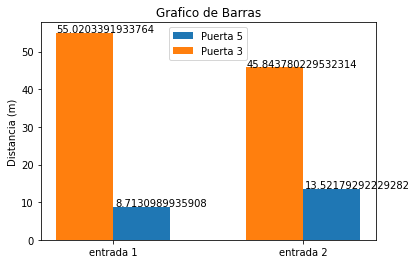

In [121]:
graficoBarras(CalcularRutas('FIIS'))
